# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y=y.reshape((len(y),1))
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc1 = StandardScaler()
X = sc.fit_transform(X)
y = sc1.fit_transform(y)

The special case in which we have also applied feature scaling to dependant variable

## Training the SVR model on the whole dataset

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\Vrund\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [8]:
sc1.inverse_transform(regressor.predict(sc.fit_transform([[6.5]])).reshape(-1,1))

array([[131106.77303274]])

## Visualising the SVR results

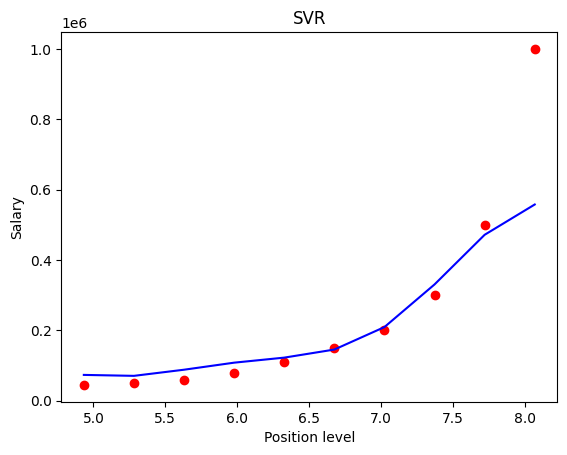

In [9]:
plt.scatter(sc.inverse_transform(X), sc1.inverse_transform(y), color = 'red')
plt.plot(sc.inverse_transform(X),sc1.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

C:\Users\Vrund\AppData\Local\Temp\ipykernel_3248\1728991953.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc.inverse_transform(X)), max(sc.inverse_transform(X)),0.1)


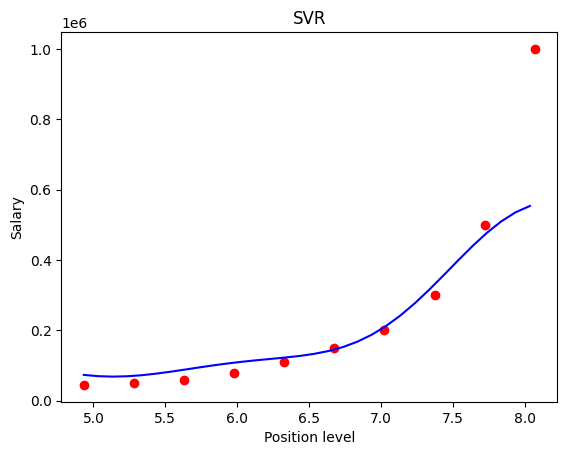

In [10]:
X_grid = np.arange(min(sc.inverse_transform(X)), max(sc.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc.inverse_transform(X), sc1.inverse_transform(y), color = 'red')
plt.plot(X_grid,sc1.inverse_transform(regressor.predict(sc.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()